In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('C:/JsCode/data/지역_국가.xlsx')

In [3]:
df

,지역,국가,운항(편),여객(명),화물(톤)
0,전체 합계,NaN,91046,9792981,1662288
1,일본,일본,12156,1483173,172415
2,중국,중국,9607,241885,287607
3,소계:아시아,NaN,33123,4437828,476455
4,아시아,네팔,97,22691,582
...,...,...,...,...,...
71,기타,이스라엘,6,108,15
72,기타,이집트,0,0,0
73,기타,지부티,0,0,0
74,기타,카타르,572,114460,28464


In [4]:
df.dropna(axis=0,inplace=True)
df

,지역,국가,운항(편),여객(명),화물(톤)
1,일본,일본,12156,1483173,172415
2,중국,중국,9607,241885,287607
4,아시아,네팔,97,22691,582
5,아시아,대만,2986,140608,28840
6,아시아,라오스,243,27279,475
...,...,...,...,...,...
71,기타,이스라엘,6,108,15
72,기타,이집트,0,0,0
73,기타,지부티,0,0,0
74,기타,카타르,572,114460,28464


In [5]:
df.drop(['지역','화물(톤)'],axis=1,inplace=True)
df

,국가,운항(편),여객(명)
1,일본,12156,1483173
2,중국,9607,241885
4,네팔,97,22691
5,대만,2986,140608
6,라오스,243,27279
...,...,...,...
71,이스라엘,6,108
72,이집트,0,0
73,지부티,0,0
74,카타르,572,114460


In [6]:
df1 = df.sort_values(by='운항(편)',ascending=False)
df1.drop(['여객(명)'],axis=1,inplace=True)

df2 = df.sort_values(by='여객(명)',ascending=False)
df2.drop(['운항(편)'],axis=1,inplace=True)

In [7]:
df_flight = df1[:10]
df_flight.index = ['1위','2위','3위','4위','5위','6위','7위','8위','9위','10위']
df_flight.index.name = '순위'
df_flight

,국가,운항(편)
순위,,
1위,미국,20041
2위,일본,12156
3위,베트남,10418
4위,중국,9607
5위,필리핀,4497
6위,태국,4121
7위,독일,3370
8위,홍콩,2993
9위,대만,2986


In [8]:
df_passenger = df2[:10]
df_passenger.index = ['1위','2위','3위','4위','5위','6위','7위','8위','9위','10위']
df_passenger.index.name = '순위'
df_passenger

,국가,여객(명)
순위,,
1위,일본,1483173
2위,베트남,1405811
3위,미국,1396365
4위,태국,764279
5위,필리핀,696884
6위,싱가포르,519726
7위,중국,241885
8위,캐나다,232024
9위,아랍에미레이트,227802


In [9]:
df_passenger.iloc[:,1]

순위
1위     1483173
2위     1405811
3위     1396365
4위      764279
5위      696884
6위      519726
7위      241885
8위      232024
9위      227802
10위     225941
Name: 여객(명), dtype: int64

In [10]:
df_passenger.iloc[:,1].sum()

7193890

In [11]:
df_passenger.iloc[:,1]/df_passenger.iloc[:,1].sum()*100


순위
1위     20.617121
2위     19.541736
3위     19.410430
4위     10.624002
5위      9.687165
6위      7.224547
7위      3.362367
8위      3.225293
9위      3.166604
10위     3.140735
Name: 여객(명), dtype: float64

In [12]:
import matplotlib.pyplot as plt
from pywaffle import Waffle


import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic' 
matplotlib.rcParams['axes.unicode_minus']=False

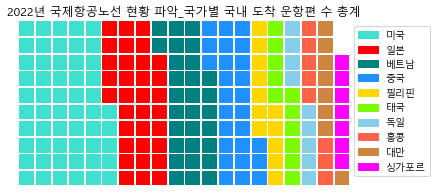

In [13]:
plt.figure(
    FigureClass=Waffle,
    rows=10,
    columns=20,
    values=df_flight['운항(편)'],
    labels=list(df_flight['국가']), 
    legend={'loc': 'upper left', 'bbox_to_anchor': (1,1)},
    colors=("turquoise", "red", "teal","dodgerblue","gold","lawngreen","skyblue","tomato","peru","fuchsia")
)
plt.title('2022년 국제항공노선 현황 파악_국가별 국내 도착 운항편 수 총계')
figsize=(1, 1)
plt.show() 

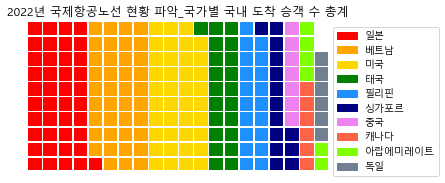

In [14]:
plt.figure(
    FigureClass=Waffle,
    rows=10,
    columns=20,
    values=df_passenger['여객(명)'],
    labels=list(df_passenger['국가']),  
    legend={'loc': 'upper left', 'bbox_to_anchor': (1,1)},
    colors=("red", "orange", "gold","green","dodgerblue","navy","violet","tomato","chartreuse","slategray")
    
)
plt.title('2022년 국제항공노선 현황 파악_국가별 국내 도착 승객 수 총계')
figsize=(1, 1)
plt.show()

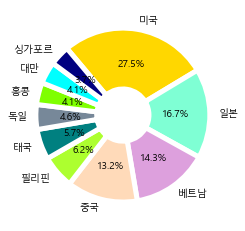

In [15]:
colors = ['gold','aquamarine','plum','peachpuff','greenyellow','teal','lightslategrey','chartreuse','aqua','navy']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
pie_labels = df_flight['국가']
pie_values = df_flight['운항(편)']
plt.pie(pie_values, labels = pie_labels, autopct='%.1f%%',startangle=130,counterclock=False, wedgeprops=wedgeprops,colors=colors)
plt.show()

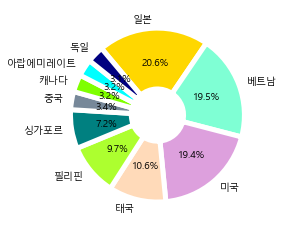

In [16]:
colors = ['gold','aquamarine','plum','peachpuff','greenyellow','teal','lightslategrey','chartreuse','aqua','navy']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
pie_labels = df_passenger['국가']
pie_values = df_passenger['여객(명)']
plt.pie(pie_values, labels = pie_labels, autopct='%.1f%%',startangle=130,counterclock=False, wedgeprops=wedgeprops,colors=colors)
plt.show()

In [17]:
import geopandas as gpd

pth = gpd.datasets.get_path('naturalearth_lowres')
world = gpd.GeoDataFrame.from_file(pth)
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [18]:
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
city = cities[cities['name'].isin(['Singapore'])]
city

,name,geometry
241,Singapore,POINT (103.85387 1.29498)


In [19]:
df_passenger

,국가,여객(명)
순위,,
1위,일본,1483173
2위,베트남,1405811
3위,미국,1396365
4위,태국,764279
5위,필리핀,696884
6위,싱가포르,519726
7위,중국,241885
8위,캐나다,232024
9위,아랍에미레이트,227802


In [20]:
world[world['name'].isin(['singapore'])]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry


In [21]:
df_world = world[world['iso_a3'].isin(['JPN','VNM','USA','THA','PHL','SGP','CHN','CAN','CAN','ARE','DEU'])]
df_world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
3,3.758926e+07,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,3.282395e+08,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
84,9.770529e+06,Asia,United Arab Emirates,ARE,421142,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
91,6.962558e+07,Asia,Thailand,THA,543548,"POLYGON ((105.21878 14.27321, 104.28142 14.416..."
94,9.646211e+07,Asia,Vietnam,VNM,261921,"POLYGON ((104.33433 10.48654, 105.19991 10.889..."
121,8.313280e+07,Europe,Germany,DEU,3861123,"POLYGON ((14.11969 53.75703, 14.35332 53.24817..."
139,1.397715e+09,Asia,China,CHN,14342903,"MULTIPOLYGON (((109.47521 18.19770, 108.65521 ..."
147,1.081166e+08,Asia,Philippines,PHL,376795,"MULTIPOLYGON (((120.83390 12.70450, 120.32344 ..."
155,1.262649e+08,Asia,Japan,JPN,5081769,"MULTIPOLYGON (((141.88460 39.18086, 140.95949 ..."


In [22]:
df_world.drop(['pop_est','continent','gdp_md_est','iso_a3'],axis=1,inplace=True)
df_world

C:\Users\Js\AppData\Local\Temp\ipykernel_9944\2102127140.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_world.drop(['pop_est','continent','gdp_md_est','iso_a3'],axis=1,inplace=True)


,name,geometry
3,Canada,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,United States of America,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
84,United Arab Emirates,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
91,Thailand,"POLYGON ((105.21878 14.27321, 104.28142 14.416..."
94,Vietnam,"POLYGON ((104.33433 10.48654, 105.19991 10.889..."
121,Germany,"POLYGON ((14.11969 53.75703, 14.35332 53.24817..."
139,China,"MULTIPOLYGON (((109.47521 18.19770, 108.65521 ..."
147,Philippines,"MULTIPOLYGON (((120.83390 12.70450, 120.32344 ..."
155,Japan,"MULTIPOLYGON (((141.88460 39.18086, 140.95949 ..."


In [23]:
#df_world1 = df_world.reindex([7,2,8,3,1,9,6,4,0])
#df_world1

In [24]:
df_world

,name,geometry
3,Canada,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,United States of America,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
84,United Arab Emirates,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
91,Thailand,"POLYGON ((105.21878 14.27321, 104.28142 14.416..."
94,Vietnam,"POLYGON ((104.33433 10.48654, 105.19991 10.889..."
121,Germany,"POLYGON ((14.11969 53.75703, 14.35332 53.24817..."
139,China,"MULTIPOLYGON (((109.47521 18.19770, 108.65521 ..."
147,Philippines,"MULTIPOLYGON (((120.83390 12.70450, 120.32344 ..."
155,Japan,"MULTIPOLYGON (((141.88460 39.18086, 140.95949 ..."


In [25]:
df_world = pd.concat([df_world,city],axis=0)
df_world

,name,geometry
3,Canada,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,United States of America,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
84,United Arab Emirates,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
91,Thailand,"POLYGON ((105.21878 14.27321, 104.28142 14.416..."
94,Vietnam,"POLYGON ((104.33433 10.48654, 105.19991 10.889..."
121,Germany,"POLYGON ((14.11969 53.75703, 14.35332 53.24817..."
139,China,"MULTIPOLYGON (((109.47521 18.19770, 108.65521 ..."
147,Philippines,"MULTIPOLYGON (((120.83390 12.70450, 120.32344 ..."
155,Japan,"MULTIPOLYGON (((141.88460 39.18086, 140.95949 ..."
241,Singapore,POINT (103.85387 1.29498)


In [26]:
df_world = df_world.reindex([155,94,4,91,147,241,139,3,84,121])
df_world.index = ['1위','2위','3위','4위','5위','6위','7위','8위','9위','10위']
df_world.index.name = '순위'

In [27]:
df_world

,name,geometry
순위,,
1위,Japan,"MULTIPOLYGON (((141.88460 39.18086, 140.95949 ..."
2위,Vietnam,"POLYGON ((104.33433 10.48654, 105.19991 10.889..."
3위,United States of America,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
4위,Thailand,"POLYGON ((105.21878 14.27321, 104.28142 14.416..."
5위,Philippines,"MULTIPOLYGON (((120.83390 12.70450, 120.32344 ..."
6위,Singapore,POINT (103.85387 1.29498)
7위,China,"MULTIPOLYGON (((109.47521 18.19770, 108.65521 ..."
8위,Canada,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
9위,United Arab Emirates,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."


In [28]:
df_world=df_world.join(df_flight)
df_world

,name,geometry,국가,운항(편)
순위,,,,
1위,Japan,"MULTIPOLYGON (((141.88460 39.18086, 140.95949 ...",미국,20041
2위,Vietnam,"POLYGON ((104.33433 10.48654, 105.19991 10.889...",일본,12156
3위,United States of America,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",베트남,10418
4위,Thailand,"POLYGON ((105.21878 14.27321, 104.28142 14.416...",중국,9607
5위,Philippines,"MULTIPOLYGON (((120.83390 12.70450, 120.32344 ...",필리핀,4497
6위,Singapore,POINT (103.85387 1.29498),태국,4121
7위,China,"MULTIPOLYGON (((109.47521 18.19770, 108.65521 ...",독일,3370
8위,Canada,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",홍콩,2993
9위,United Arab Emirates,"POLYGON ((51.57952 24.24550, 51.75744 24.29407...",대만,2986


In [29]:
df_world=df_world.join(df_passenger.drop(['국가'],axis=1))
df_world

,name,geometry,국가,운항(편),여객(명)
순위,,,,,
1위,Japan,"MULTIPOLYGON (((141.88460 39.18086, 140.95949 ...",미국,20041,1483173
2위,Vietnam,"POLYGON ((104.33433 10.48654, 105.19991 10.889...",일본,12156,1405811
3위,United States of America,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",베트남,10418,1396365
4위,Thailand,"POLYGON ((105.21878 14.27321, 104.28142 14.416...",중국,9607,764279
5위,Philippines,"MULTIPOLYGON (((120.83390 12.70450, 120.32344 ...",필리핀,4497,696884
6위,Singapore,POINT (103.85387 1.29498),태국,4121,519726
7위,China,"MULTIPOLYGON (((109.47521 18.19770, 108.65521 ...",독일,3370,241885
8위,Canada,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",홍콩,2993,232024
9위,United Arab Emirates,"POLYGON ((51.57952 24.24550, 51.75744 24.29407...",대만,2986,227802


NameError: name 'collections' is not defined

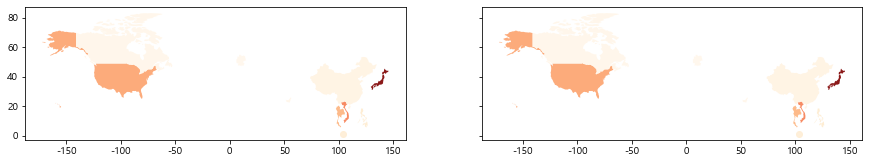

In [47]:
fig, ax = plt.subplots(ncols=2, sharey=True, figsize =(15,10))
df_world.plot(ax=ax[0], column='운항(편)', cmap='OrRd', legend=False, alpha=0.9)
df_world.plot(ax=ax[1], column='운항(편)', cmap='OrRd', legend=False, alpha=0.9)
patch_col = ax[0],collections[0]
cb = colorbar(patch_col, ax=ax, shrink=0.5)
ax[0].set_title('국가')
ax[1].set_title('국가')
ax[0].set_axis_off()
ax[1].set_axis_off()